<center>

# Trabajo Práctico Tecnologías Emergentes 
# Machine Learning

### Alumnos: 


| Alumno | Padrón | 
|---|---|
| Federico Mariano Penic | 102501 | 
| Tomas Lubertino | 95140 | 
| Alumno | Padrón |  

<br></br>

Repositorio del Trabajo Práctico: https://github.com/fedepenic/Tecnologias-Emergentes-Machine-Learning

</center>

## Introducción

La temática de nuestro proyecto será el tópico de Machine Learning. Para poder demostrar mejor las cualidades y usos de esta tecnología, decidimos inscribirnos en una competencia de Machine Learning en un sitio web dedicado a tal fin. En este caso, escogimos [Kaggle](https://www.kaggle.com/).

Por lo tanto, a lo largo de esta presentación, nos concentraremos en realizar el ciclo completo de Machine Learning, que comprende etapas como (Entre otras): Análisis exploratorio y limpieza de datos, visualización, tuning de hiperparámetros, feature engineering, elección de mejor modelo predictivo y entrenamiento del modelo. 

## Acerca de la competencia 

La competencia a la que nos inscribimos tiene como objetivo principal predecir los precios de diferentes hogares presentes en Ames, Iowa, Estados Unidos. Para esto, contamos con mucha información acerca de diversos aspectos de las casas que en muchas ocasiones no se tienen en cuenta, como por ejemplo el sistema eléctrico o el tipo de cimientos.

Empleando todas las técnicas relacionadas con el Machine Learning, que mencionamos en la introducción, podremos determinar las variables o features tienen una mayor incidencia en el precio final de la residencia. 

Se puede encontrar más información de la competencia en el siguiente [link](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview).

## Acerca de los datos 

La competencia nos provee con 4 archivos de un total de 957,39 Kb para poder cumplir con nuestros cometidos. 

- train.csv que será nuestro set de entrenamiento, a partir del cual entrenaremos nuestro modelos. 
- test.csv que será nuestro set de prueba, a partir del cual nuestros modelos realizarán predicciones, que posteriormente se subirán a la plataforma. 
- data_description.txt que es una descripción detallada de cada una de las features. 
- sample_submission.csv que ejemplifica una posible predicción final, empleando un sencillo modelo de regresión lineal. 

Para tener un mejor entendimiento de los datos, vamos a mostrar las primeras 15 filas de los primeros dos archivos en formato DataFrame: 

In [2]:
import pandas as pd

pd.set_option('display.max_columns', None)

train_data = pd.read_csv('train.csv')
train_data.head(15)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
test_data = pd.read_csv('test.csv')
test_data.head(15)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,763.0,763.0,GasA,Gd,Y,SBrkr,763,892,0,1655,0.0,0.0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1993.0,Fin,2.0,440.0,TA,TA,Y,157,84,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,6,7,1992,2007,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,Gd,PConc,Gd,TA,No,ALQ,935.0,Unf,0.0,233.0,1168.0,GasA,Ex,Y,SBrkr,1187,0,0,1187,1.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Attchd,1992.0,Fin,2.0,420.0,TA,TA,Y,483,21,0,0,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1998,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,789.0,789.0,GasA,Gd,Y,SBrkr,789,676,0,1465,0.0,0.0,2,1,3,1,TA,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,393.0,TA,TA,Y,0,75,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,7,5,1990,1990,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,PConc,Gd,TA,Gd,GLQ,637.0,Unf,0.0,663.0,1300.0,GasA,Gd,Y,SBrkr,1341,0,0,1341,1.0,0.0,1,1,2,1,Gd,5,Typ,1,Po,Attchd,1990.0,Unf,2.0,506.0,TA,TA,Y,192,0,0,0,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,1970,1970,Gable,CompShg,

In [5]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [6]:
len(train_data)

1460

In [7]:
len(test_data)

1459

In [8]:
len(train_data.columns)

81

In [9]:
len(test_data.columns)

80

Como podemos apreciar, contamos con los datos de 1460 hogares para realizar el entrenamiento de nuestros modelos. Por su parte, el set de test, a partir del cual efectuaremos las predicciones, posee 1459 entradas. 

Adicionalmente, la cantidad de features totales es 79 (Ya que el identificador no se considera un feature). Lógicamente, en el set de test contamos con una columna menos, ya que el precio de las residencias es el propósito de nuestras predicciones. 

## Acerca de los Features

A continuación, procederemos a explicar brevemente cada uno de los features presentes en los sets de datos: 

TO DO ...

## Limpieza de los datos

TO DO ...

## Análisis Exploratorio

Habiendo entendido los datos de entrada (Tanto del set de train como del set de test), nos encontramos en condiciones de realizar un análisis exploratorio de datos. 

En pos de cumplir con ese objetivo, plantearemos preguntas iniciales, sobre las cuales indagaremos, profundizando en los datos e incluyendo visualizaciones para facilitar la comprensión. 

Finalmente, incorporaremos una conclusión basada en los datos brindados, para corroborar si nuestras hipótesis fueron o no acertadas. 

Seguidamente, comenzamos con las preguntas ...

### El año de construcción de la vivienda impacta en el precio de la misma? 

Parecería lógico que el año de construcción del hogar en cuestión tenga una implicancia a la hora de establecer el precio de la misma. Será que las construcciones más antiguas son más caras o las más nuevas? 
Uno tendería a creer que las casas más modernas son las más costosas, ya que se utilizan materiales más sofisticados, en conjunto con técnicas más avanzadas, a causa del constante progreso de la tecnología. 
Pero hay otros aspectos a tener en cuenta también, ya que por ejemplo, en la era contemporánea los hogares suelen ser un poco más pequeños en comparación a décadas anteriores. Y esto también puede tener consecuencias en los precios, debido a que, a mayor cantidad de metros cuadrados, mayor valor.
<br> </br>
En fin, hay muchos asuntos a considerar relacionados con el año de construcción. Únicamente los datos nos darán la respuesta. Para interpretar mejor la información, a continuación, mostramos en el siguiente gráfico la distribución por año de las casas presentes en el set de entrenamiento, en conjunto con su precio: 

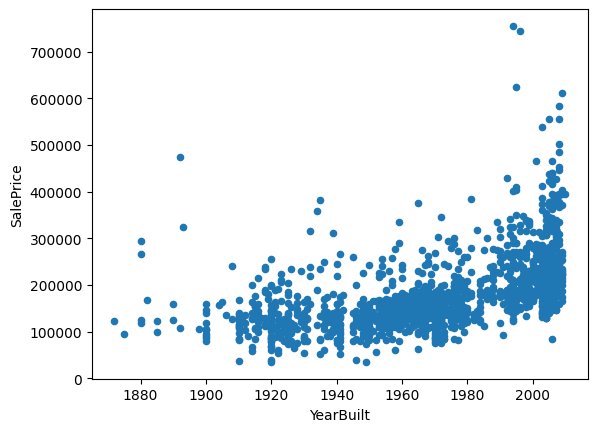

In [8]:
import matplotlib.pyplot as plt

plot = train_data.plot("YearBuilt", "SalePrice", kind="scatter")
plt.show() 

Gracias al gráfico, podemos observar una ligera tendencia hacia las casas más nuevas siendo más costosas. Sin embargo, puede resultar un tanto engañoso, ya que no se puede ver a simple vista la cantidad de viviendas por década o año. Para enriquecer la comprensión, haremos uso de este otro gráfico, en el cual podemos ver la cantidad de hogares por cada década:

<AxesSubplot: xlabel='YearBuilt', ylabel='Number of Houses'>

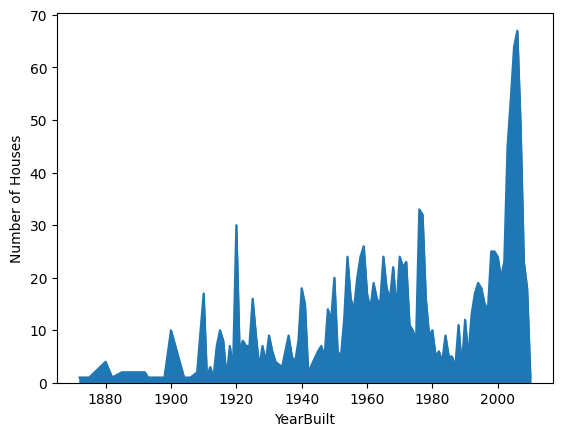

In [9]:
train_data.groupby(['YearBuilt'])['YearBuilt'].count().plot(kind='area', ylabel='Number of Houses')

In [14]:
housesPerYear = train_data.groupby(['YearBuilt'])['YearBuilt'].count().to_frame()
pd.set_option('display.max_rows', None)
housesPerYear

,YearBuilt
YearBuilt,
1872,1
1875,1
1880,4
1882,1
1885,2
1890,2
1892,2
1893,1
1898,1


En conclusión, parecería que hay una brecha de datos antes y después del año 2000. Pero vamos a ponerlo en números: 

In [17]:
len(train_data.loc[train_data['YearBuilt'] >= 2000])

388

In [19]:
len(train_data.loc[train_data['YearBuilt'] < 2000])

1072

Por lo tanto, se puede deducir que tenemos un alto número de hogares que fueron construidos en la década de los 2000. Mientras que tenemos un número aún mayor previo a los 2000, pero no concentrados en una sola década, sino que mejor distribuidos.

En definitiva, para responder la pregunta inicial de esta sección, los datos indican que el año de construcción tiene un rol fundamental a la hora de determinar el precio de la vivienda. Contamos con datos de muchas casas modernas, y la mayoría posee un precio mayor al de las residencias construidas previo al año 2000. 

También contamos con un número alto de datos en referencia a hogares construidos previos al año 2000, pero con una distribución mayor. No obstante, en todas esas décadas, el precio parecería ser menor. Quizás resultaría interesante contar con más datos década por década antes del año 2000, para efectuar un corolario más certero, pero con los datos que contamos, es correcto decir que las viviendas más nuevas son las más caras.  

## Más preguntas de análisis exploratorio

TO DO ...

## Cómo hacemos las predicciones? 

Una vez hecho el análisis exploratorio y habiendo conocido mejor los datos, ya estamos en condiciones de realizar las predicciones de precios. Con este fin, vamos a hacer uso de distintos modelos de Machine Learning. En particular, decidimos elegir Random Forest, XGBoost, LightGBM y CatBoost (Debido a la gran difusión de estos métodos). 
<br></br>
Haremos pruebas con todos estos modelos, subiendo periódicamente los resultados a la plataforma de Kaggle. Finalmente, podremos concluir cual fue el modelo que mejor se adaptó a nuestras necesidades y datos. 

Pero antes de pasar a esta fase, efectuaremos una etapa de Feature Engineering, en la cual crearemos nuevos Features que pensamos, pueden ayudar a una mejor predicción de los modelos.

## Feature Engineering

TO DO ...

## Modelos

In [10]:
import warnings
warnings.filterwarnings("ignore", category=Warning)
from pycaret.datasets import get_data

In [15]:
train_data.shape

(1460, 81)

In [16]:
data = train_data.sample(frac=0.95, random_state=786).reset_index(drop=True)
data_unseen = dataset.drop(data.index).reset_index(drop=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (1387, 81)
Unseen Data For Predictions: (22613, 24)


In [19]:
from pycaret.classification import *

In [23]:
exp_clf101 = setup(data = data, target = 'SalePrice', session_id=10001)

,Description,Value
0,session_id,10001
1,Target,SalePrice
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(1387, 81)"
5,Missing Values,True
6,Numeric Features,19
7,Categorical Features,61
8,Ordinal Features,False
9,High Cardinality Features,False


In [24]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


### Comparación de modelos

In [25]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dummy,Dummy Classifier,0.0186,0.0000,0.0104,0.0004,0.0007,0.0000,0.0000,0.0210
ada,Ada Boost Classifier,0.0175,0.0000,0.0098,0.0005,0.0011,0.0054,0.0079,0.5190
nb,Naive Bayes,0.0165,0.0000,0.0118,0.0112,0.0129,0.0135,0.0137,0.1120
et,Extra Trees Classifier,0.0165,0.0000,0.0102,0.0109,0.0124,0.0128,0.0129,0.6160
lightgbm,Light Gradient Boosting Machine,0.0165,0.0000,0.0100,0.0107,0.0123,0.0135,0.0136,10.4890
rf,Random Forest Classifier,0.0134,0.0000,0.0087,0.0100,0.0110,0.0094,0.0095,1.1350
dt,Decision Tree Classifier,0.0124,0.0000,0.0075,0.0090,0.0100,0.0093,0.0094,0.1130
lda,Linear Discriminant Analysis,0.0113,0.0000,0.0072,0.0076,0.0087,0.0084,0.0085,0.4100
ridge,Ridge Classifier,0.0082,0.0000,0.0056,0.0052,0.0060,0.0041,0.0042,0.0420
gbc,Gradient Boosting Classifier,0.0082,0.0000,0.0048,0.0038,0.0045,0.0017,0.0017,266.0150


In [26]:
print(best_model)

DummyClassifier(constant=None, random_state=10001, strategy='prior')


### Random Forest

In [27]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.0000,0.0000,0.0000,0.0000,0.0000,-0.0032,-0.0032
1,0.0000,0.0000,0.0000,0.0000,0.0000,-0.0042,-0.0042
2,0.0103,0.0000,0.0070,0.0103,0.0103,0.0057,0.0058
3,0.0000,0.0000,0.0000,0.0000,0.0000,-0.0039,-0.0040
4,0.0309,0.0000,0.0200,0.0206,0.0241,0.0267,0.0270
5,0.0103,0.0000,0.0069,0.0034,0.0052,0.0066,0.0067
6,0.0206,0.0000,0.0135,0.0155,0.0172,0.0165,0.0167
7,0.0619,0.0000,0.0397,0.0498,0.0533,0.0581,0.0587
8,0.0000,0.0000,0.0000,0.0000,0.0000,-0.0034,-0.0035


In [29]:
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.0206,0.0000,0.0104,0.0004,0.0008,0.0000,0.0000
1,0.0103,0.0000,0.0103,0.0001,0.0002,0.0000,0.0000
2,0.0103,0.0000,0.0103,0.0001,0.0002,0.0000,0.0000
3,0.0206,0.0000,0.0104,0.0004,0.0008,0.0000,0.0000
4,0.0206,0.0000,0.0104,0.0004,0.0008,0.0000,0.0000
5,0.0206,0.0000,0.0105,0.0004,0.0008,0.0000,0.0000
6,0.0206,0.0000,0.0104,0.0004,0.0008,0.0000,0.0000
7,0.0206,0.0000,0.0105,0.0004,0.0008,0.0000,0.0000
8,0.0206,0.0000,0.0104,0.0004,0.0008,0.0000,0.0000


In [28]:
print(rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=10001,
                       verbose=0, warm_start=False)


In [30]:
print(tuned_rf)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=7, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.5, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=110,
                       n_jobs=-1, oob_score=False, random_state=10001,
                       verbose=0, warm_start=False)


In [31]:
plot_model(tuned_rf, plot = 'auc')

IntProgress(value=0, description='Processing: ', max=5)

ValueError: Found input variables with inconsistent numbers of samples: [122181, 215172]

<Figure size 576x396 with 0 Axes>

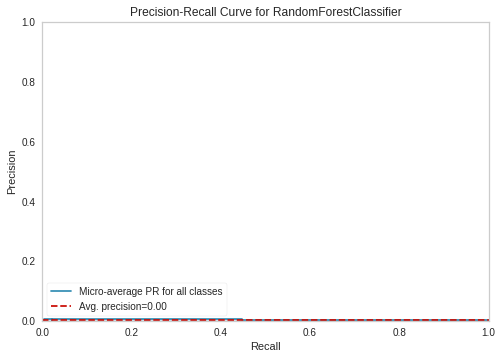

In [32]:
plot_model(tuned_rf, plot = 'pr')

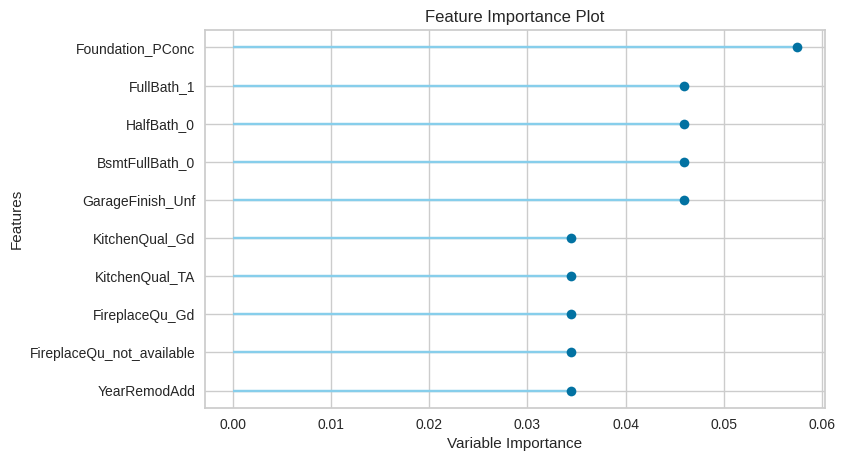

In [33]:
plot_model(tuned_rf, plot='feature')

In [35]:
plot_model(tuned_rf, plot = 'confusion_matrix')

KeyboardInterrupt: 

In [ ]:
evaluate_model(tuned_rf)

In [ ]:
predict_model(tuned_rf)

In [ ]:
final_rf = finalize_model(tuned_rf)
print(final_rf)

In [ ]:
predict_model(final_rf)

In [ ]:
unseen_predictions = predict_model(final_rf, data=data_unseen)
unseen_predictions.head()

### TODO: Evaluar el modelo con los datos de prueba

### LightGBM

Inlcuir Tuning de hiperparámetros y Feature Importance. 

TO DO ...

### CatBoost

Inlcuir Tuning de hiperparámetros y Feature Importance.

TO DO ...

### XGBoost

Inlcuir Tuning de hiperparámetros y Feature Importance. 

TO DO ...

## Conclusiones finales

Acá escribimos cual fue el modelo que nos dió mejores resultados, y también ponemos la posición final en la que quedamos en la competencia de Kaggle. También buscamos la forma de comparar lo que serían los resultados correctos con el mejor resultado obtenido por nosotros. 

TO DO ...